In [49]:
%pylab inline
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
from ABC_functions import *
from LRT_functions import *
from scipy import stats
PLOTDIR='/storage/BonnieH/selection_project/figures/figures/summ_stats/'

Populating the interactive namespace from numpy and matplotlib


In [50]:
def plot_figure(fig_num, per, opt_allele, y_pos, objects, suffix_list, avg_summ_stats, std_err_summ_stats, diff_min, diff_max, fig_type, model):
    if model == 'eurodem_merge':
        model_name = 'European demographic model: 56k generations'
    if model == '20k_merge':
        model_name = '20k generations'
    if model == '50k_merge':
        model_name = '50k generations'
    title_dic ={}
    
    title_dic['het'] = 'Heterozygosity'
    title_dic['common'] = 'Number common alleles'
    title_dic['bins'] = 'Bins'
    print(fig_num)
    plt.figure(fig_num)
    #y_label = ''
    title = ''
    filename = ''
    #error = 'range'
    y_label = "Mean " + title_dic[suffix_list]
    
    if fig_type == 0:
    
        plt.errorbar(y_pos, avg_summ_stats, yerr=[diff_min,diff_max], marker = 'o') 
        
    if fig_type == 1:
        plt.errorbar(y_pos, avg_summ_stats, yerr=std_err_summ_stats, marker = 'o')
        error = 'sd'
    
    if fig_type == 2:
        for opt in opt_allele:
            plt.errorbar(y_pos, avg_summ_stats[opt], marker = 'o', label = '(%d %d)'%(per, opt))
        error = ''
        
        plt.legend()
        
    plt.xticks(y_pos, objects)
    plt.xticks(rotation=70)
    plt.xlabel("S value")
    plt.ylabel(y_label)
    opt_allele = ''.join(str(item) for item in opt_allele)
    if fig_type== 2:
        plt.title("%s v. s \n Model: %s"%(title_dic[suffix_list], model_name))
    else:
        plt.title("%s v. s \n Per=%d; Opt allele=%s\n Error bars = %s"%(title_dic[suffix_list], per, str(opt_allele), error))
    plt.savefig('%s%s_per_%d_opt_%s_%s.pdf'%(PLOTDIR, suffix_list,per, opt_allele, model), bbox_inches='tight')
    #plt.savefig(PLOTDIR + 'common_v_s_trinuc.pdf', bbox_inches='tight')

In [51]:
def GraphIndiv(per, opt_alleles):
    optimal_ru_list = list(opt_alleles.split(','))
    optimal_ru_list = list(map(int, optimal_ru_list))
    suffix_list = ['het','common']
    
    svals = [0, 10**-6, 10**-5, 10**-4, 10**-3, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.15, 0.2, 0.4, 0.7, 1]
    fig_num = 0
    for optimal_ru in optimal_ru_list:
        avg_summ_stats = [[],[],[]]
        std_err_summ_stats = [[],[],[]]
        min_summ_stats = [[],[],[]]
        max_summ_stats = [[],[],[]]

        for s in svals:
        
            file_prefix = '/gymreklab-tscc/bonnieh/lrt/results/' + 'euro_valid' + '/' + str(per) + '_' + str(optimal_ru)

            list_of_lists = GetAllLRTLists(file_prefix, suffix_list,s)

            for i in range(0, len(list_of_lists)):
                summ_stat_list = list_of_lists[i]
                avg = np.mean(summ_stat_list)
                avg_summ_stats[i].append(avg)

                std_err = stats.sem(summ_stat_list)
                std_err_summ_stats[i].append(std_err)

                min_summ_stats[i].append(min(summ_stat_list))
                max_summ_stats[i].append(max(summ_stat_list))

        objects = ('0', '10**-6', '10**-5', '10**-4', '0.001', '0.004', '0.007', '0.01', '0.04', '0.07', '0.1', '0.15', '0.2', '0.4', '0.7', '1')
        y_pos = np.arange(len(objects))


        for i in range(0, len(suffix_list)):

            diff_min = []
            diff_max = []


            zip_object = zip(avg_summ_stats[i], min_summ_stats[i])
            for list1_i, list2_i in zip_object:
                diff_min.append(list1_i-list2_i)

            zip_object = zip(avg_summ_stats[i], max_summ_stats[i])
            for list1_i, list2_i in zip_object:
                diff_max.append(list2_i-list1_i)
            
                
            fig_types = [0]
            for fig_type in fig_types:
                fig_num = fig_num + 1
                print(fig_num)
                plot_figure(fig_num, per, optimal_ru, y_pos, objects, suffix_list[i], avg_summ_stats[i], std_err_summ_stats[i], diff_min, diff_max, fig_type)

In [52]:
def GraphMult(per, opt_alleles_list, fig_num, model):
    #opt_alleles_list = list(opt_alleles.split(','))
    #opt_alleles_list = list(map(int, opt_alleles_list))
    suffix_list = ['het','common']
    
    svals = [0, 10**-6, 10**-5, 10**-4, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8]
    
    mean_het = {}
    mean_common = {}
    for opt_allele in opt_alleles_list:
        mean_het[opt_allele] = []
        mean_common[opt_allele] = []
        
        for s in svals:
            #print(s)
            file_prefix = '/gymreklab-tscc/bonnieh/lrt/results/' + model + '/' + str(per) + '_' + str(opt_allele) # euro_valid

            list_of_lists = GetAllLRTLists(file_prefix, suffix_list,s)

            het_list = list_of_lists[0]
            mean = np.mean(het_list)
            mean_het[opt_allele].append(mean)
            
            common_list = list_of_lists[1]
            mean = np.mean(common_list)
            mean_common[opt_allele].append(mean)
            
    objects = ('0', '10**-6', '10**-5', '10**-4', '0.0004', '0.0007', '0.001', '0.004', '0.007', '0.01', '0.04', '0.07', '0.1', '0.15', '0.2', '0.4', '0.6', '0.8')
    y_pos = np.arange(len(objects))
    fig_num = fig_num + 1
    plot_figure(fig_num, per, opt_alleles_list, y_pos, objects, 'het', mean_het, 0, 0, 0, 2, model)
    fig_num = fig_num + 1
    plot_figure(fig_num, per, opt_alleles_list, y_pos, objects, 'common', mean_common, 0, 0, 0, 2, model)
    return fig_num

In [53]:
def main():
    
    # Load parameters
    pers = [1,2,3,4]
    opt_allele_dic = {}
    opt_allele_dic[1] = np.arange(12,48,4)
    opt_allele_dic[2] = np.arange(11,21,1)
    opt_allele_dic[3] = np.arange(5,13,1)
    opt_allele_dic[4] = np.arange(7,11,1)
    #per = 3
    #optimal_alleles = ['5','6','7','8','9','10','11','12','5,6,7,8,9,10,11,12','8,9,10,11,12']
    #opt_alleles = '5,6,7,8,9,10,11,12'
    
    #for optimal_allele in optimal_alleles:
    #GraphIndiv(per, opt_alleles)
    models = ['20k_merge' , '50k_merge', 'eurodem_merge']
    fig_num = 0
    for per in pers:
        for model in models:
            opt_alleles = opt_allele_dic[per]
            fig_num = GraphMult(per, opt_alleles, fig_num, model)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


22
23
24
CPU times: user 20.5 s, sys: 543 ms, total: 21 s
Wall time: 1min 5s


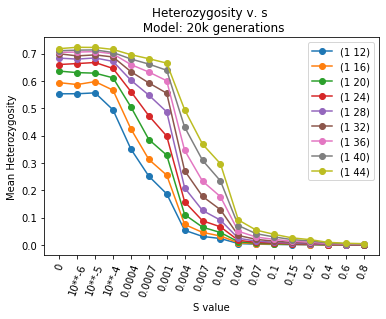

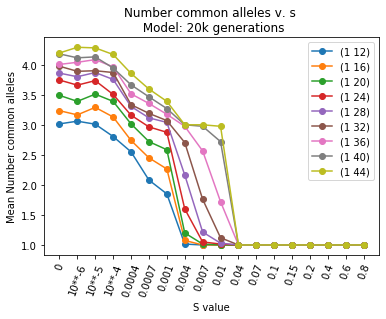

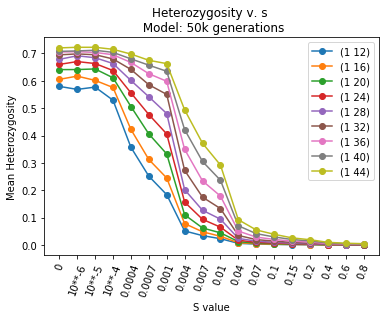

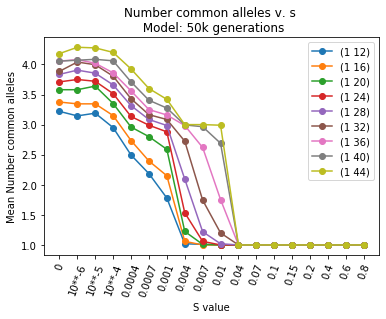

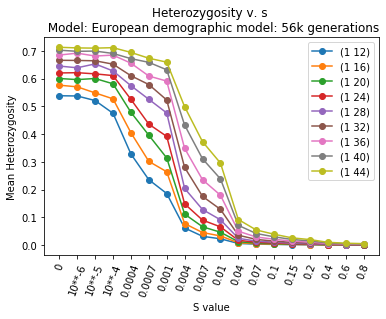

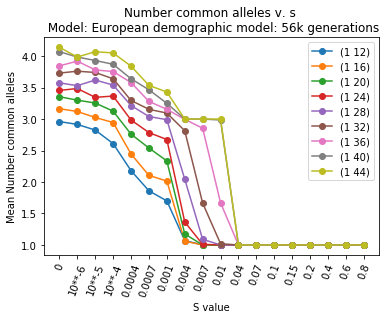

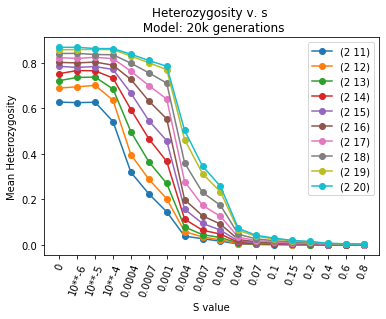

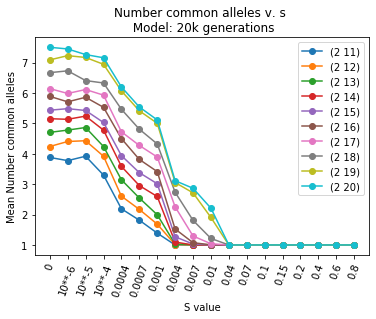

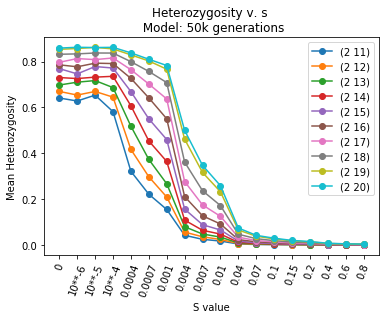

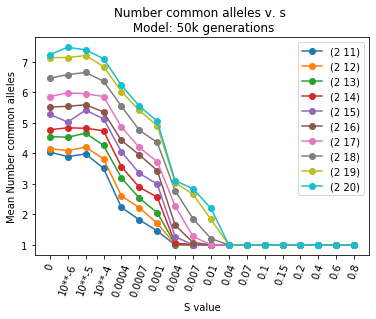

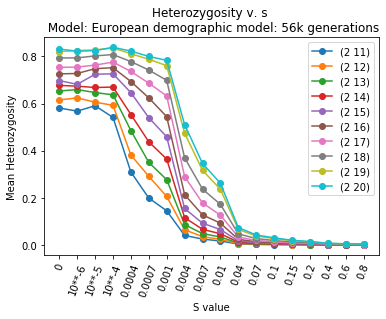

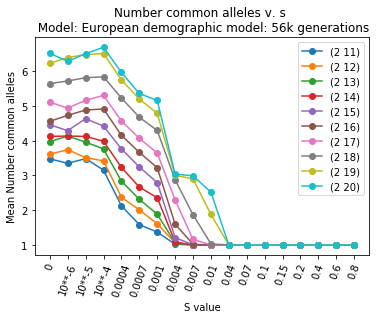

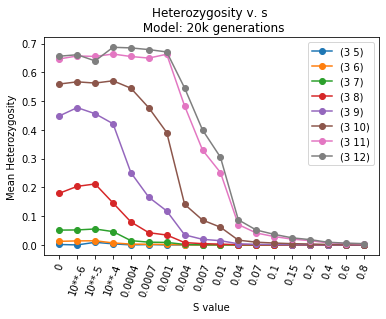

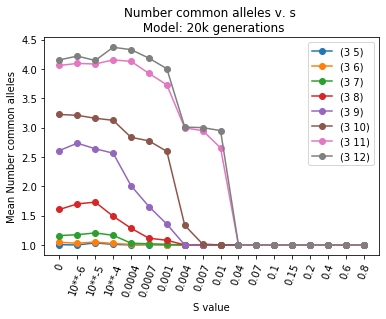

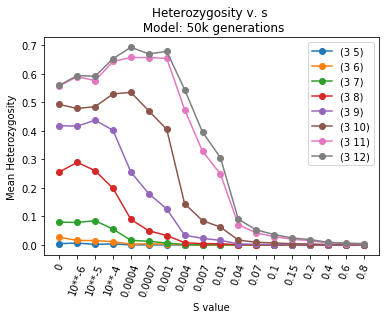

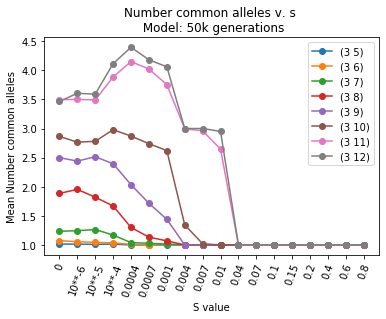

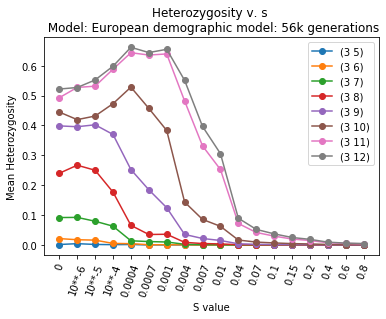

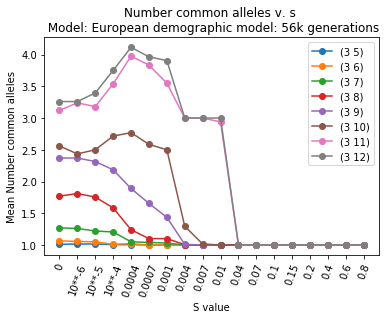

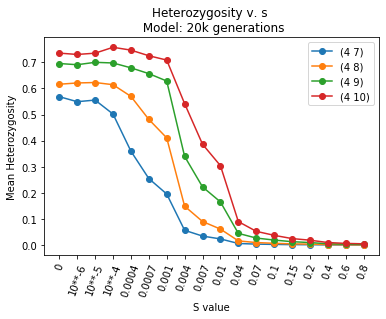

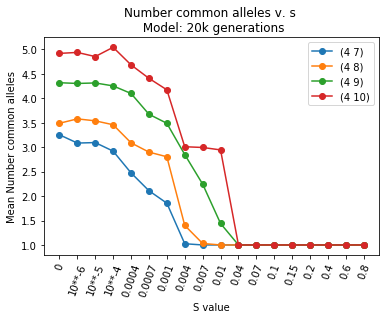

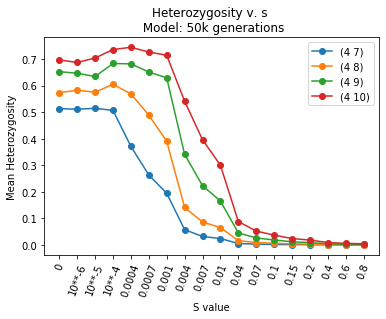

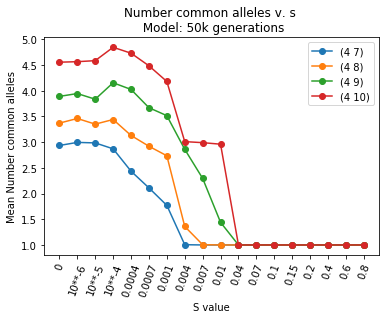

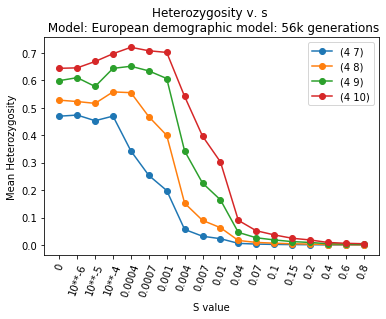

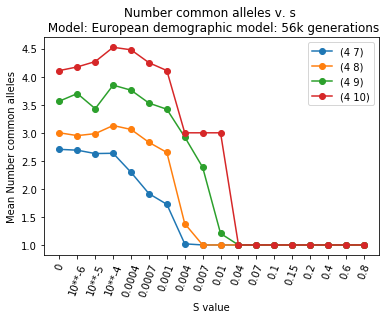

In [54]:
%%time
if __name__ == '__main__':
    main()